MSE: 207.91715060774996
RMSE: 14.419332529897144
R2 Score: 0.030085923188504338
                       Feature  Coefficient
0  parental level of education    -1.006718
1      test preparation course    -3.840039


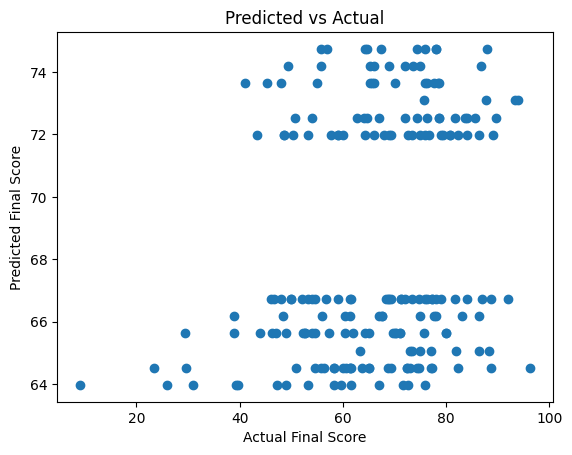

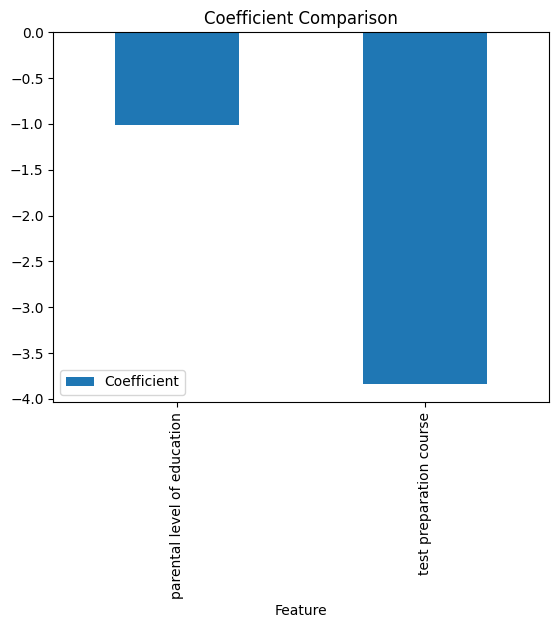

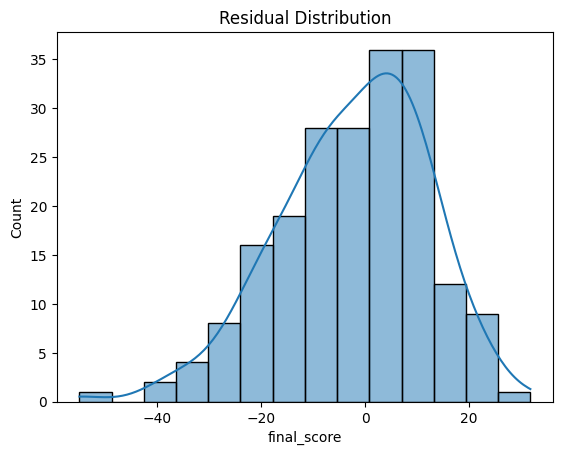

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/kaggle/input/datasets/spscientist/students-performance-in-exams/StudentsPerformance.csv")

le = LabelEncoder()
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

df['final_score'] = (
    df['math score'] +
    df['reading score'] +
    df['writing score']
) / 3

X = df[['parental level of education', 'test preparation course']]
y = df['final_score']

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coeff_df)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Predicted vs Actual")
plt.show()

coeff_df.set_index("Feature").plot(kind="bar")
plt.title("Coefficient Comparison")
plt.show()

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


Degree: 2
Train RMSE: 4.65569411694416
Test RMSE: 3.709562659957147
R2 Score: 0.7440623896917427
Degree: 3
Train RMSE: 4.652079209359919
Test RMSE: 3.7166348027954004
R2 Score: 0.7430855884466042
Degree: 4
Train RMSE: 4.640869165866196
Test RMSE: 3.757395909779757
R2 Score: 0.7374194192854786


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


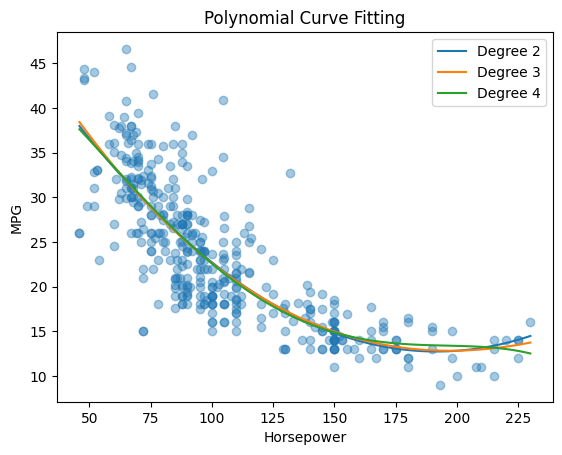

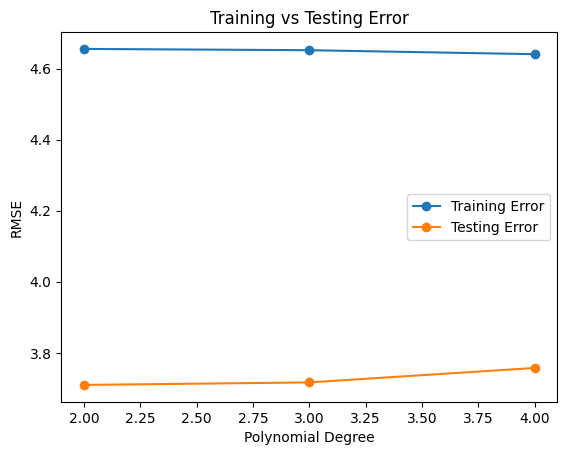

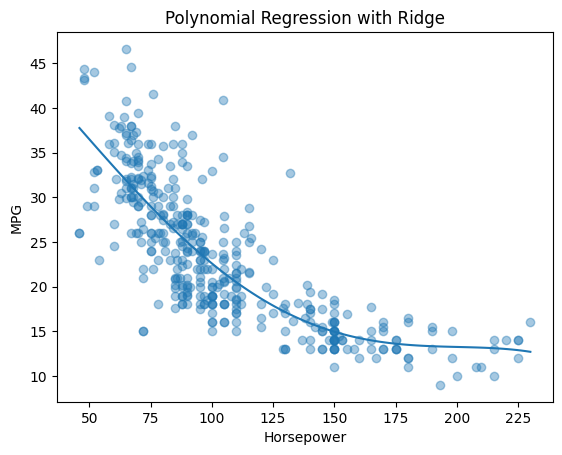

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("/kaggle/input/datasets/organizations/uciml/autompg-dataset/auto-mpg.csv")

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

X = df[['horsepower']]
y = df['mpg']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

degrees = [2, 3, 4]
train_rmse = []
test_rmse = []

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

    print("Degree:", d)
    print("Train RMSE:", train_rmse[-1])
    print("Test RMSE:", test_rmse[-1])
    print("R2 Score:", r2_score(y_test, y_test_pred))

plt.figure()
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_scaled = scaler.transform(X_range)

for d in degrees:
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_scaled)
    model = LinearRegression()
    model.fit(X_poly, y)

    X_range_poly = poly.transform(X_range_scaled)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, label=f"Degree {d}")

plt.scatter(X, y, alpha=0.4)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting")
plt.legend()
plt.show()

plt.figure()
plt.plot(degrees, train_rmse, marker='o', label="Training Error")
plt.plot(degrees, test_rmse, marker='o', label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()

ridge = Ridge(alpha=1.0)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_scaled)
ridge.fit(X_poly, y)

X_range_poly = poly.transform(X_range_scaled)
y_ridge_pred = ridge.predict(X_range_poly)

plt.figure()
plt.scatter(X, y, alpha=0.4)
plt.plot(X_range, y_ridge_pred)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression with Ridge")
plt.show()
